In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cv2

In [2]:
def importImage(imdir):
    
    im_array = plt.imread(imdir)
    im_array = (im_array * 255).astype(np.float32)
    im_array = im_array[:,:,:3]

    height = np.shape(im_array)[0]
    width = np.shape(im_array)[1]
    
    channels = np.shape(im_array)[2]
    
    return im_array, width, height, channels

In [3]:
image_dir = "./triangles-rgb.png"
image0, width, height, channels = importImage(image_dir)
print("image : ", np.shape(image0))

image :  (100, 100, 3)


In [4]:
data = np.reshape(image0, (height*width, 3))
data0 = np.copy( data )
print("data : ", np.shape(data0))

data :  (10000, 3)


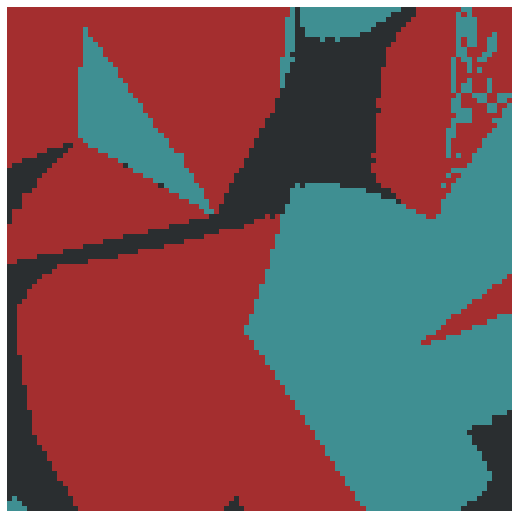

In [22]:
ret,label,center=cv2.kmeans(data=data0,
                            K=3,
                            bestLabels=None,
                            criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0),
                            attempts=1,
                            flags=cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((data.shape))

cenas = np.reshape(res2, (100,100,3))

fig = plt.figure(figsize=(15,7), frameon=False)

ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(cenas, aspect='equal')

In [ ]:
ret,label,center=cv2.kmeans(data=data0,
                            K=3,
                            bestLabels=np.random.randint(3, size=(data.shape[0] * data.shape[1], 1), dtype=np.int32),
                            criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0),
                            attempts=1,
                            flags=cv2.KMEANS_USE_INITIAL_LABELS,
                            centers = np.array([[255,0,0],[0,255,0],[0,0,255]], dtype=np.float32))

center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((data.shape))

cenas = np.reshape(res2, (100,100,3))

fig = plt.figure(figsize=(15,7), frameon=False)

ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(cenas, aspect='equal')